C:\Users\phili\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


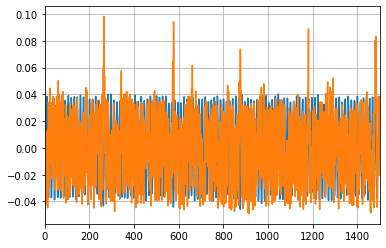

In [53]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import FastICA

def load_data(file):
    mat = scipy.io.loadmat(file)
    return mat['val'][0]

def show_subplot(ax, y, start, stop):
    x_linspace = np.linspace(0, len(y), len(y))
    ax.set_xlim([start, stop])
    ax.plot(x_linspace, y)

def apply_filter(y_transformed, strength):
    filtered_y = np.array([])
    for row in y_transformed.T:
        
        filtered_row = savgol_filter(row, strength, 1)
        filtered_row = filtered_row.T
        filtered_y = np.append(filtered_y, filtered_row)
        filtered_y = np.reshape(filtered_y, (-1, 1500))
    return filtered_y.T

def main():
    fig_subset_view, ax = plt.subplots()
    ax.grid()
    file = 'heartbeat_data/000.mat'
    y = load_data(file)

    y_transposed = y.T
    # print(len(y))

    transformer = FastICA(n_components = 2)
    y_transformed = transformer.fit_transform(y_transposed)
    filtered_y = apply_filter(y_transformed, 10)


    show_subplot(ax, y_transformed, 0, 1500)

main()